In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import timeline_drawer
from datetime import datetime
import time
# transpile
from qiskit.transpiler import InstructionDurations, PassManager
from qiskit.transpiler.passes import DynamicalDecoupling, Unroller, ALAPSchedule, LookaheadSwap, BasicSwap
#RB
import numpy as np
from qiskit_experiments.library import randomized_benchmarking as rb
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
from qiskit_experiments.library.randomized_benchmarking import RBUtils
from qiskit_experiments.library.randomized_benchmarking.rb_experiment_dd_3 import StandardRB_dd
from qiskit_experiments.library import StandardRB, InterleavedRB
import qiskit.circuit.library as circuits
from qiskit.circuit import Delay, Instruction
from qiskit.circuit.library.standard_gates import RXXGate, RZZGate, RZXGate, XGate, SXGate, IGate, CCXGate, SGate, CXGate
from qiskit_experiments.library.randomized_benchmarking.double_interleaved_rb_experiment import DoubleInterleavedRB


In [3]:

IBMQ.save_account('befca44219528a564b7f4d3f53707de8985c22fb7b8c969ef2728c830de7c612716e76f41fbc0a52d65f63e71a3a2437948befd3042b1ffab4ced07d573192f1')
IBMQ.load_account()
IBMQ.providers()

configrc.store_credentials:WARNING:2022-06-28 08:01:24,795: Credentials already present. Set overwrite=True to overwrite.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-community', group='qamp', project='spring-22-17')>,
 <AccountProvider for IBMQ(hub='ibm-q-community', group='qamp', project='spring-22-17-2')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='internal', project='reservations')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='squirl')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>]

In [5]:
provider=IBMQ.providers()[4]
#provider = IBMQ.get_provider(hub='ibm-q-community', group='qamp', project='spring-22-17')
#backend=provider.backend.ibmq_lima
backend = provider.get_backend('ibm_perth')

# get the basic feautures including qubit number of the backend.
config = backend.configuration()
backend_job_limit=backend.job_limit()

print("{0} is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}.{6} are the list of connected qubits."
      "{7} can handle maximum {8} circuits(experiments) per job."
      "Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is {9}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates,
                config.coupling_map,
               config.backend_name,
               config.max_experiments,
               backend_job_limit.maximum_jobs))

ibm_perth is on version 1.1.24. It has 7 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 5], [4, 5], [5, 3], [5, 4], [5, 6], [6, 5]] are the list of connected qubits.ibm_perth can handle maximum 300 circuits(experiments) per job.Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is None.


ibmq_jakarta
2022-06-27 20:25:29.400641


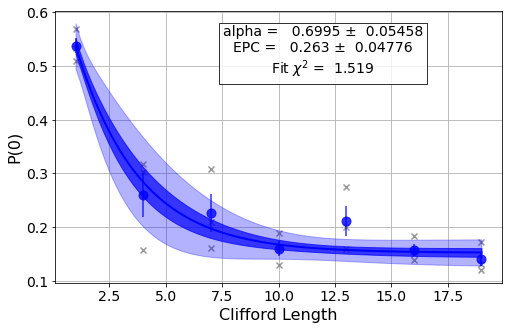

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.5505168740574399, 0.6994684278199526, 0.1517438229919361]
- χ²: 1.5193062772064527
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.70+/-0.05
- χ²: 1.5193062772064527
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.26+/-0.05
- χ²: 1.5193062772064527
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


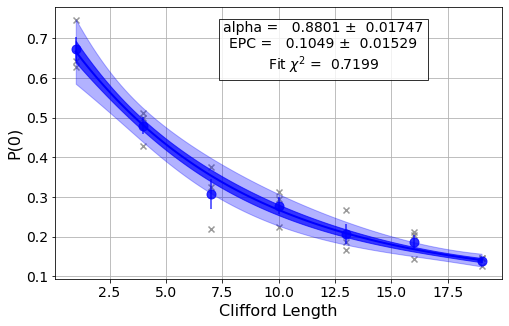

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6641209059298973, 0.8801363661247305, 0.08225025717570036]
- χ²: 0.7198905827018472
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.880+/-0.017
- χ²: 0.7198905827018472
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.105+/-0.015
- χ²: 0.7198905827018472
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


In [14]:
lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [0,1,2]
print(backend)
print(datetime.today())

exp1 = StandardRB_dd(qubits, lengths, backend, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()
display(expdata1.figure(0))
for result in results1:
    print(result)
exp2 = StandardRB(qubits, lengths, backend, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()
display(expdata2.figure(0))
for result in results2:
    print(result)



ibmq_jakarta
2022-06-27 20:47:06.801809


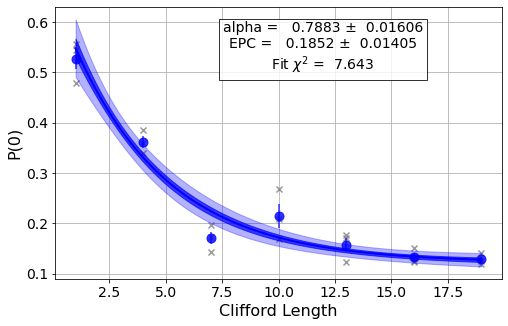

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.5405508070521725, 0.7883298028116549, 0.12168873847350682]
- χ²: 7.6430015774701925
- quality: bad
- extra: <4 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.788+/-0.016
- χ²: 7.6430015774701925
- quality: bad
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.185+/-0.014
- χ²: 7.6430015774701925
- quality: bad
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False


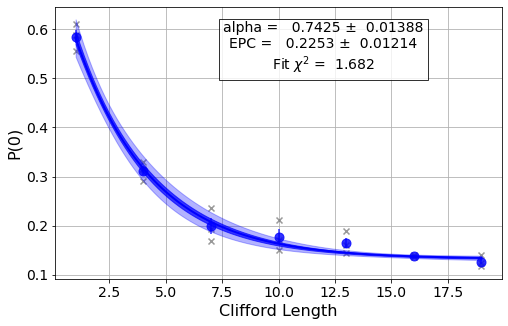

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6064439162927278, 0.7425491749912752, 0.13204308351746655]
- χ²: 1.6822207450980753
- quality: good
- extra: <4 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.743+/-0.014
- χ²: 1.6822207450980753
- quality: good
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.225+/-0.012
- χ²: 1.6822207450980753
- quality: good
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False


In [5]:
lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [1,3,5]
print(backend)
print(datetime.today())

exp1 = StandardRB_dd(qubits, lengths, backend, num_samples=num_samples, seed=seed, dd_sequence=[XGate(), XGate()])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()
display(expdata1.figure(0))
for result in results1:
    print(result)
exp2 = StandardRB(qubits, lengths, backend, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()
display(expdata2.figure(0))
for result in results2:
    print(result)

ibmq_jakarta
2022-06-27 21:11:39.207632


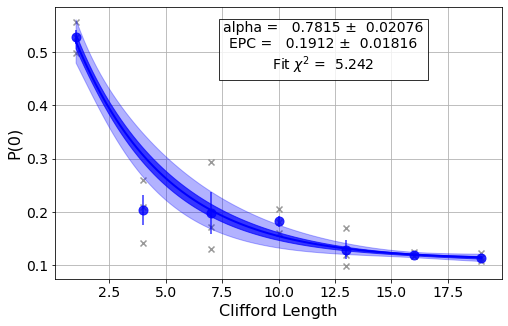

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.525807998524946, 0.7815064437043009, 0.10981884205267238]
- χ²: 5.242084081639312
- quality: bad
- extra: <4 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.782+/-0.021
- χ²: 5.242084081639312
- quality: bad
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.191+/-0.018
- χ²: 5.242084081639312
- quality: bad
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False


In [7]:
lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [1,3,5]
print(backend)
print(datetime.today())

exp1 = StandardRB_dd(qubits, lengths, backend, num_samples=num_samples, seed=seed, dd_sequence=[XGate(), XGate(), XGate(),XGate()])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()
display(expdata1.figure(0))
for result in results1:
    print(result)

ibmq_jakarta
2022-06-27 20:55:39.707939


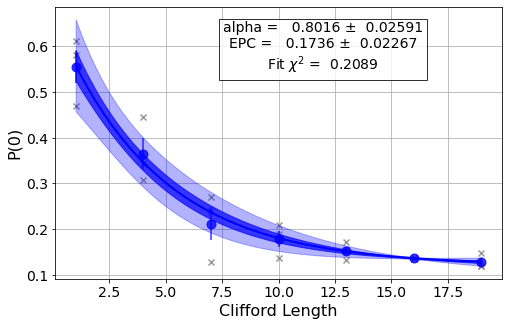

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.5465020884518127, 0.8016422900726888, 0.12060835719463758]
- χ²: 0.20889169011990255
- quality: good
- extra: <4 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.802+/-0.026
- χ²: 0.20889169011990255
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.174+/-0.023
- χ²: 0.20889169011990255
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False


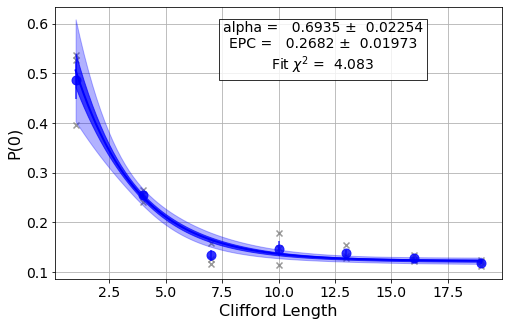

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.5535126043232168, 0.6934871402941838, 0.12215291891716497]
- χ²: 4.0830429575903775
- quality: bad
- extra: <4 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.693+/-0.023
- χ²: 4.0830429575903775
- quality: bad
- extra: <1 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.268+/-0.020
- χ²: 4.0830429575903775
- quality: bad
- extra: <1 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False


In [6]:
lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [4,5,6]
print(backend)
print(datetime.today())

exp1 = StandardRB_dd(qubits, lengths, backend, num_samples=num_samples, seed=seed, dd_sequence=[XGate(), XGate()])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()
display(expdata1.figure(0))
for result in results1:
    print(result)
exp2 = StandardRB(qubits, lengths, backend, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()
display(expdata2.figure(0))
for result in results2:
    print(result)

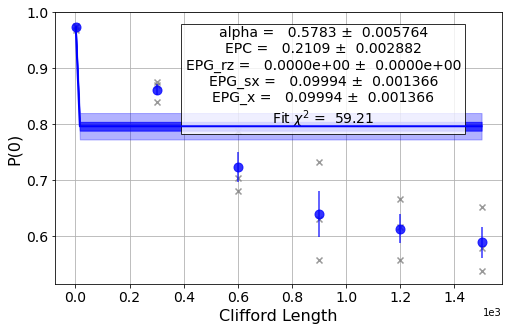

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.30550268795801205, 0.578250888229141, 0.796141266381826]
- χ²: 59.20761505476347
- quality: bad
- extra: <4 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.578+/-0.006
- χ²: 59.20761505476347
- quality: bad
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.2109+/-0.0029
- χ²: 59.20761505476347
- quality: bad
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0+/-0
- χ²: 59.20761505476347
- quality: bad
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.0999+/-0.0014
- χ²: 59.20761505476347
- quality: bad
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.0999+/-0.0014
- χ²: 59.20761505476347
- quality: bad
- extra: <1 items>
- device_components: ['

In [15]:
lengths_1_qubit=np.arange(1,1700,300)
num_samples=3
seed=1010
exp_1q = StandardRB(qubits=[2], lengths=lengths_1_qubit, num_samples=num_samples, seed=seed)
expdata1=exp_1q.run(backend).block_for_results()
results1 = expdata1.analysis_results()
display(expdata1.figure(0))
for result in results1:
    print(result)

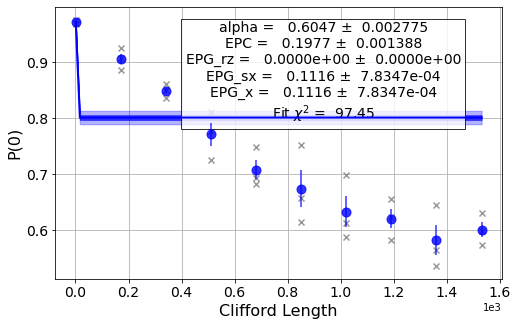

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.2809546610671801, 0.6046965731769411, 0.8013232086871979]
- χ²: 97.45476762712303
- quality: bad
- extra: <4 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.6047+/-0.0028
- χ²: 97.45476762712303
- quality: bad
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.1977+/-0.0014
- χ²: 97.45476762712303
- quality: bad
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0+/-0
- χ²: 97.45476762712303
- quality: bad
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.1116+/-0.0008
- χ²: 97.45476762712303
- quality: bad
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.1116+/-0.0008
- χ²: 97.45476762712303
- quality: bad
- extra: <1 items>
- device_components:

In [14]:
lengths_1_qubit=np.arange(1,1700,170)
num_samples=3
seed=1010
exp_1q = StandardRB(qubits=[2], lengths=lengths_1_qubit, num_samples=num_samples, seed=seed)
expdata1=exp_1q.run(backend).block_for_results()
results1 = expdata1.analysis_results()
display(expdata1.figure(0))
for result in results1:
    print(result)

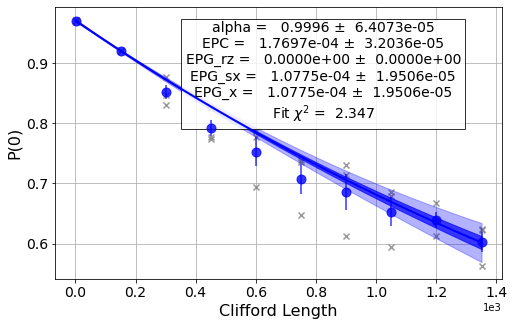

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.9706651556987484, 0.999646061584498, 1.7754434881908876e-16]
- χ²: 2.347097730076132
- quality: good
- extra: <4 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.99965+/-0.00006
- χ²: 2.347097730076132
- quality: good
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000177+/-0.000032
- χ²: 2.347097730076132
- quality: good
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0+/-0
- χ²: 2.347097730076132
- quality: good
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.000108+/-0.000020
- χ²: 2.347097730076132
- quality: good
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.000108+/-0.000020
- χ²: 2.347097730076132
- quality: good
- extra: <1 item

In [9]:
lengths_1_qubit=np.arange(1,1500,150)
num_samples=3
seed=1010
exp_1q = StandardRB(qubits=[2], lengths=lengths_1_qubit, num_samples=num_samples, seed=seed)
expdata1=exp_1q.run(backend).block_for_results()
results1 = expdata1.analysis_results()
display(expdata1.figure(0))
for result in results1:
    print(result)

In [10]:
lengths_2_qubit = np.arange(1, 200, 30)
lengths_1_qubit = np.arange(1, 2000, 200)
num_samples = 3
seed = 1010
qubits = (0,1)
print(backend)

# Run a 1-qubit RB expriment on qubits 1, 4 to determine the error-per-gate of 1-qubit gates
single_exps = BatchExperiment(
    [
        StandardRB([qubit], lengths_1_qubit, num_samples=num_samples, seed=seed)
        for qubit in qubits
    ],
    flatten_results=True,
)
expdata_1q = single_exps.run(backend).block_for_results()

ibm_perth


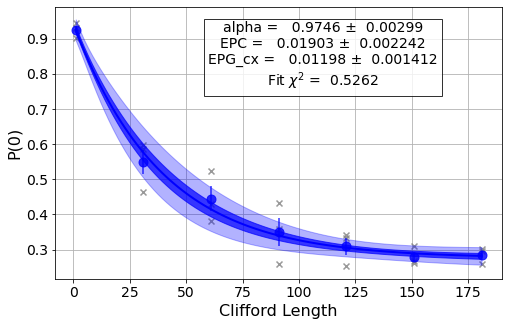

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6659378371223366, 0.9746298475500208, 0.2756419612298716]
- χ²: 0.5261869628360607
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9746+/-0.0030
- χ²: 0.5261869628360607
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0190+/-0.0022
- χ²: 0.5261869628360607
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPG_cx
- value: 0.0120+/-0.0014
- χ²: 0.5261869628360607
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False


In [12]:
exp_2q = StandardRB(qubits, lengths_2_qubit, num_samples=num_samples, seed=seed)
expdata2=exp_2q.run(backend).block_for_results()
exp_2q.analysis.set_options(epg_1_qubit=expdata_1q.analysis_results())
results2 = expdata2.analysis_results()
display(expdata2.figure(0))
for result in results2:
    print(result)

You can view the experiment online at https://quantum-computing.ibm.com/experiments/452b0e7c-61c9-4eae-a9e0-f289b9d395b4
Component experiment 0


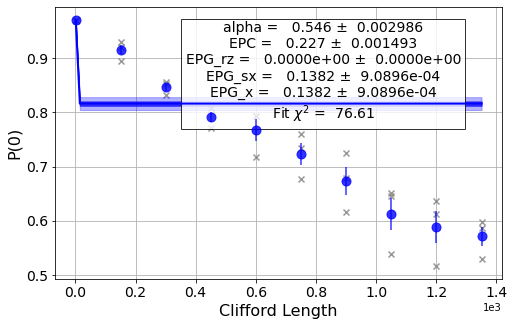

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.28200546637596247, 0.5460441076145468, 0.8164782936745014]
- χ²: 76.61450339455426
- quality: bad
- extra: <4 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.5460+/-0.0030
- χ²: 76.61450339455426
- quality: bad
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.2270+/-0.0015
- χ²: 76.61450339455426
- quality: bad
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0+/-0
- χ²: 76.61450339455426
- quality: bad
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.1382+/-0.0009
- χ²: 76.61450339455426
- quality: bad
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.1382+/-0.0009
- χ²: 76.61450339455426
- quality: bad
- extra: <1 items>
- device_components

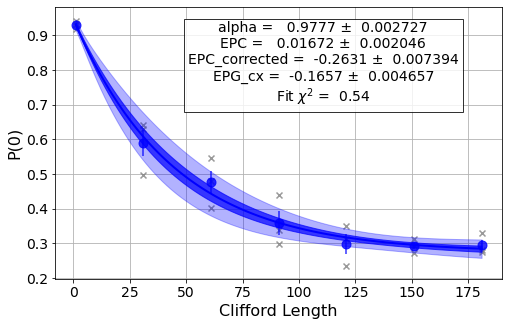

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6718744336287693, 0.9777006525448182, 0.2734706648065421]
- χ²: 0.5400128583456404
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9777+/-0.0027
- χ²: 0.5400128583456404
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0167+/-0.0020
- χ²: 0.5400128583456404
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPC_corrected
- value: -0.263+/-0.007
- χ²: 0.5400128583456404
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPG_cx
- value: -0.166+/-0.005
- χ²: 0.5400128583456404
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False


In [11]:
lengths_1_qubit=np.arange(1,1500,150)
exp_2q = StandardRB(qubits, lengths_2_qubit, num_samples=num_samples, seed=seed)
exp_1q = StandardRB(qubits=[2], lengths=lengths_1_qubit, num_samples=num_samples, seed=seed)
exp_2q.analysis.set_options(epg_1_qubit=expdata_1q.analysis_results())
exps=[exp_1q,exp_2q]
par_exp=ParallelExperiment(exps)
par_expdata=par_exp.run(backend).block_for_results()
par_expdata.save()
par_results=par_expdata.analysis_results()
sub_results=[]
sub_results_list=[]
for i in range(par_exp.num_experiments):
    print(f"Component experiment {i}")
    sub_data = par_expdata.component_experiment_data(i)
    display(sub_data.figure(0))
    sub_result=sub_data.analysis_results()
    sub_results += sub_result
    sub_results_list.append(sub_result)
    for result in sub_result:
        print(result)


You can view the experiment online at https://quantum-computing.ibm.com/experiments/263583d6-dc65-4533-8fa7-f901ed6b4a5c
Component experiment 0


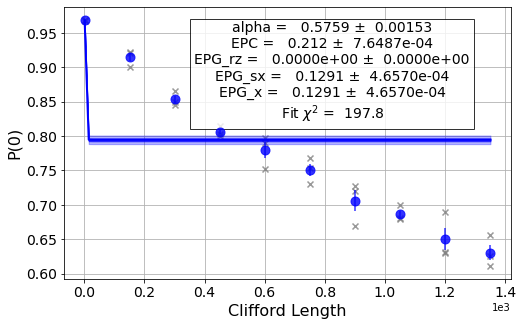

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.3018908275224989, 0.5759453050494572, 0.7945102995273793]
- χ²: 197.78656316769883
- quality: bad
- extra: <4 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.5759+/-0.0015
- χ²: 197.78656316769883
- quality: bad
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.2120+/-0.0008
- χ²: 197.78656316769883
- quality: bad
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0+/-0
- χ²: 197.78656316769883
- quality: bad
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.1291+/-0.0005
- χ²: 197.78656316769883
- quality: bad
- extra: <1 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.1291+/-0.0005
- χ²: 197.78656316769883
- quality: bad
- extra: <1 items>
- device_compo

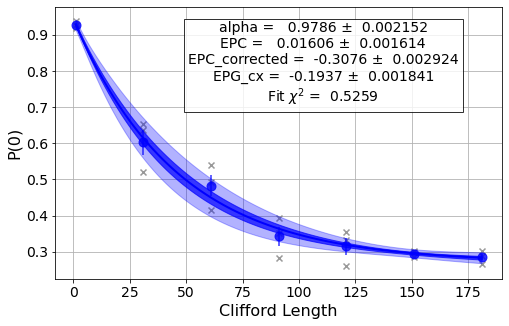

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6722035751063742, 0.9785928778501796, 0.27000751793906563]
- χ²: 0.525909048204563
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9786+/-0.0022
- χ²: 0.525909048204563
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0161+/-0.0016
- χ²: 0.525909048204563
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPC_corrected
- value: -0.3076+/-0.0029
- χ²: 0.525909048204563
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPG_cx
- value: -0.1937+/-0.0018
- χ²: 0.525909048204563
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
[DbAnalysisResultV1(name=@Parameters_RBAnalysis, value=[0.3018908275224989, 0.57594

In [6]:
lengths_1_qubit=np.arange(1,1500,150)
exp_2q = StandardRB(qubits, lengths_2_qubit, num_samples=num_samples, seed=seed)
exp_1q = StandardRB(qubits=[2], lengths=lengths_1_qubit, num_samples=num_samples, seed=seed)
exp_2q.analysis.set_options(epg_1_qubit=expdata_1q.analysis_results())
exps=[exp_1q,exp_2q]
par_exp=ParallelExperiment(exps)
par_expdata=par_exp.run(backend).block_for_results()
par_expdata.save()
par_results=par_expdata.analysis_results()
sub_results=[]
sub_results_list=[]
for i in range(par_exp.num_experiments):
    print(f"Component experiment {i}")
    sub_data = par_expdata.component_experiment_data(i)
    display(sub_data.figure(0))
    sub_result=sub_data.analysis_results()
    sub_results += sub_result
    sub_results_list.append(sub_result)
    for result in sub_result:
        print(result)


In [7]:
lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [0,1,2]
print(backend)
print(datetime.today())

exp1 = StandardRB_dd(qubits, lengths, backend, num_samples=num_samples, seed=seed, dd_sequence=[XGate(),XGate()])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()
display(expdata1.figure(0))
for result in results1:
    print(result)
exp2 = StandardRB(qubits, lengths, backend, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()
display(expdata2.figure(0))
for result in results2:
    print(result)

ibm_perth
2022-06-27 21:54:53.482809


Job data not added for errorred job [Job ID: 62b9a8a4716a315338560754]
Error message: Delays must be a multiple of 16 samples. Error code: 8043.
Analysis callback failed [Experiment ID: 5711a531-cab3-4dee-967a-1494582d65bf][Analysis Callback ID: 54fdb99017e2448f8f97d16f8a4293af]:
Traceback (most recent call last):
  File "c:\users\kimje\qiskit-experiments\qiskit_experiments\database_service\db_experiment_data.py", line 535, in _run_analysis_callback
    callback(self, **kwargs)
  File "c:\users\kimje\qiskit-experiments\qiskit_experiments\framework\base_analysis.py", line 157, in run_analysis
    results, figures = analysis._run_analysis(expdata)
  File "c:\users\kimje\qiskit-experiments\qiskit_experiments\curve_analysis\curve_analysis.py", line 174, in _run_analysis
    formatted_data = self._format_data(processed_data)
  File "c:\users\kimje\qiskit-experiments\qiskit_experiments\library\randomized_benchmarking\rb_analysis.py", line 168, in _format_data
    data_allocation, xdata, ydat

IndexError: list index out of range

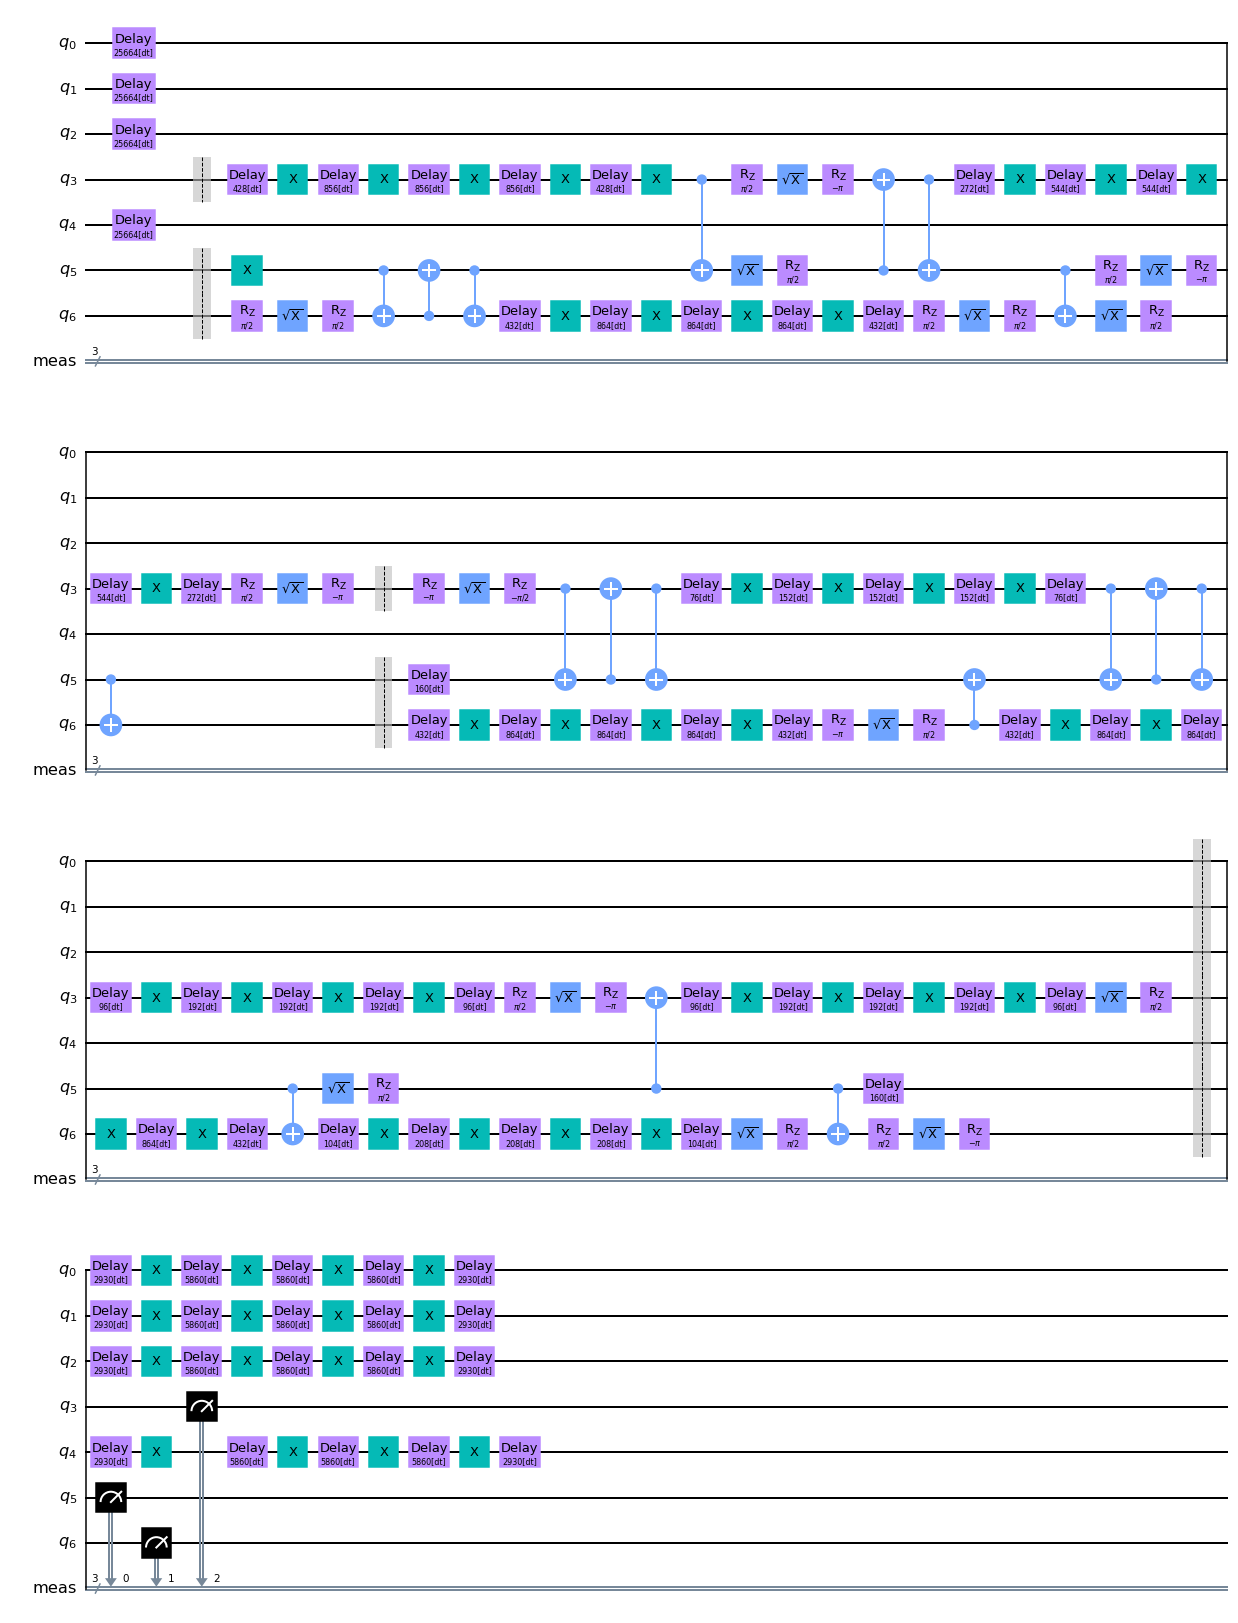

In [25]:
durations=InstructionDurations.from_backend(backend)
dd_sequence=[XGate(),XGate(),XGate(),XGate()]
pm=PassManager([ALAPSchedule(durations), DynamicalDecoupling(durations, dd_sequence)])
pm.run(test).draw(output='mpl')

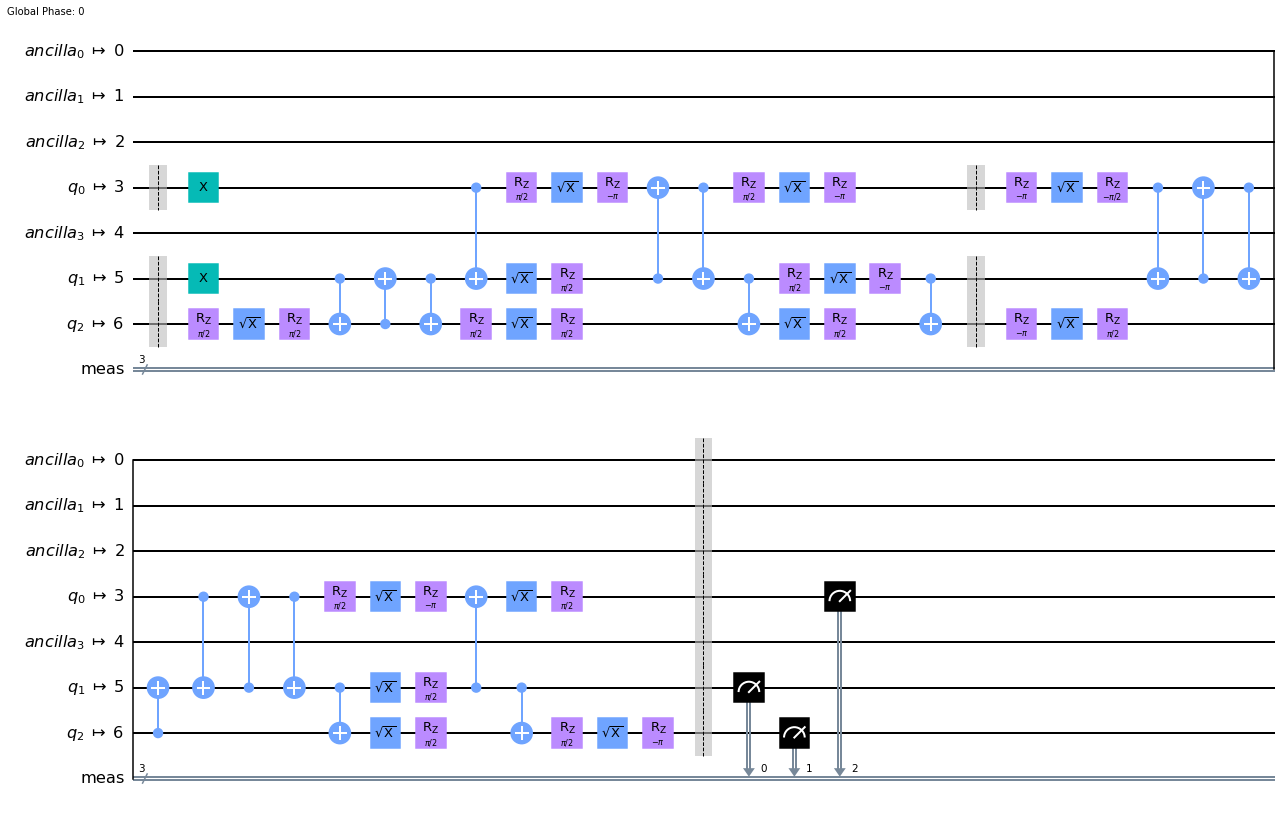

In [24]:
test=exp.circuits()[0]
test=transpile(test, backend)
test.draw(output='mpl')

# 2q : need to make pulse dd sequence corresponding to the single qubit gate length

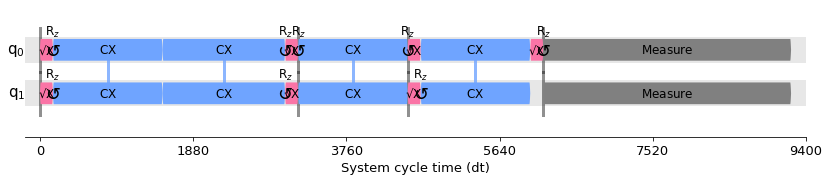

In [36]:
dd_sequence=[XGate(),XGate()]
durations=InstructionDurations.from_backend(backend)
pm=PassManager([ALAPSchedule(durations),DynamicalDecoupling(durations, dd_sequence)])
c_dd=pm.run(c_trnaspile)
timeline_drawer(c_dd)


In [6]:
lengths = [1,2,3]
num_samples = 3
seed = 1010
qubits = [0,1,2]

exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)

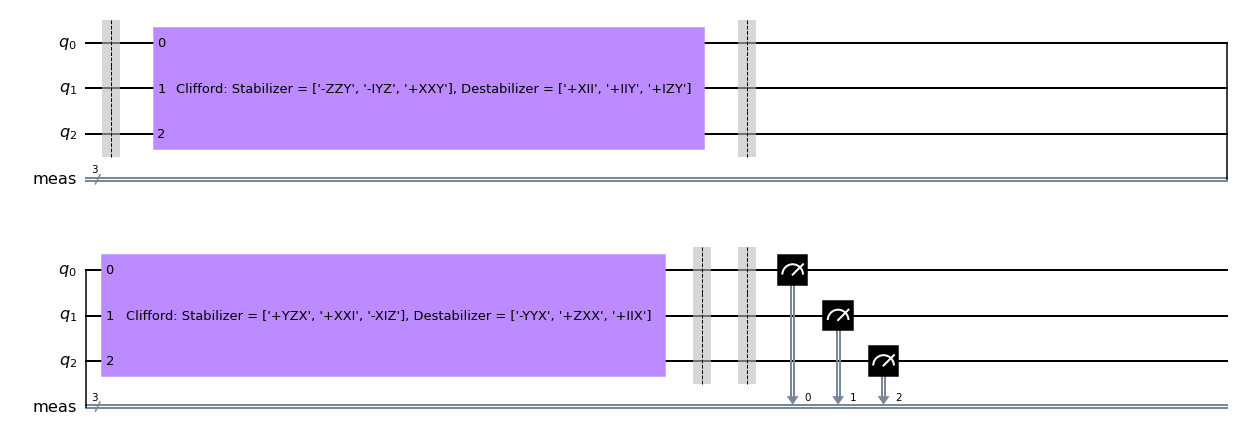

In [7]:
exp1.circuits()[0].draw(output='mpl')

In [92]:
def DD_added_RB_circuits(exp):
    circ=exp.circuits()
    dd_sequence=[XGate(),XGate(),XGate(),XGate()]
    durations=InstructionDurations.from_backend(backend)
    pm=PassManager([ALAPSchedule(durations), DynamicalDecoupling(durations, dd_sequence)])
    exp_transpiled=[]
    for i in circ:
        transpiled=transpile(i,backend)
        dd=pm.run(transpiled)
        exp_transpiled.append(dd)
    return exp_transpiled



# need to change the circuits into StandardRB object which can be 'run'

In [93]:
DD_added_RB_circuits(exp1)

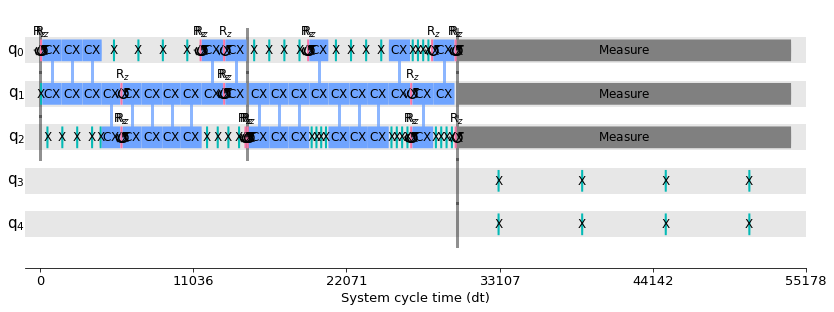

In [60]:
timeline_drawer(exp1_transpiled[0])

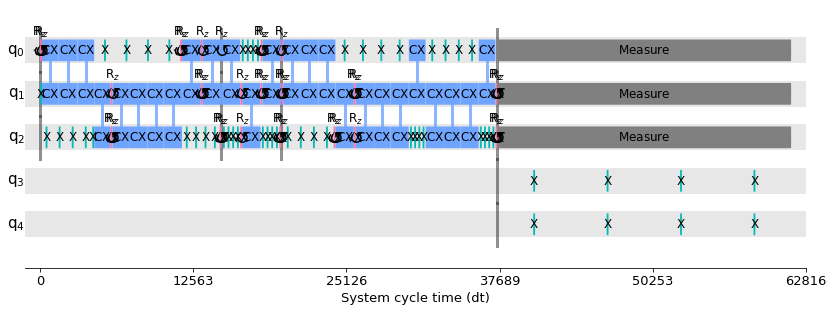

In [61]:
timeline_drawer(exp1_transpiled[1])

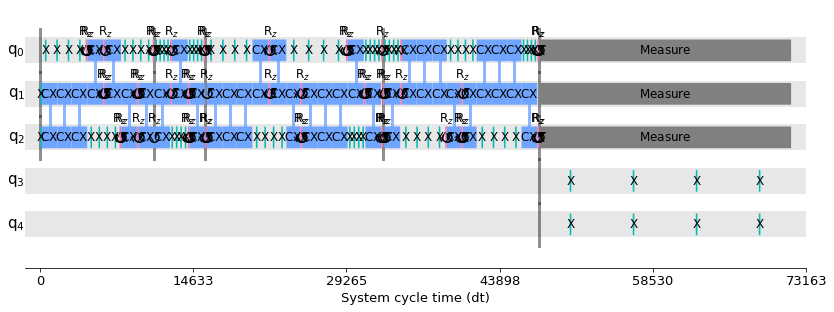

In [62]:
timeline_drawer(exp1_transpiled[2])

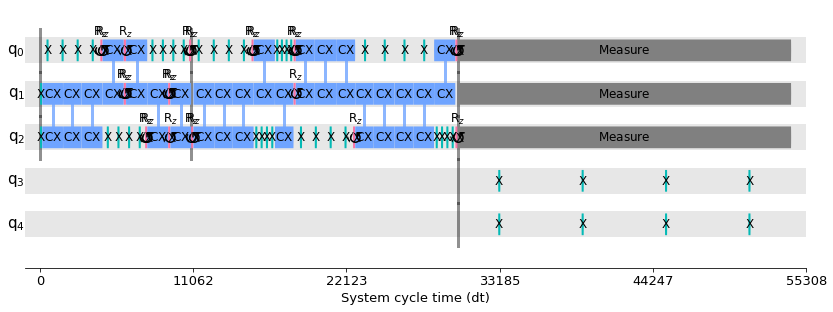

In [18]:
dd_sequence=[XGate(),XGate(),XGate(),XGate()]
durations=InstructionDurations.from_backend(backend)
pm=PassManager([ALAPSchedule(durations), DynamicalDecoupling(durations, dd_sequence)])
dd=pm.run(c_trnaspile)
timeline_drawer(dd)

In [28]:
import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import XGate
from qiskit.transpiler import PassManager, InstructionDurations
from qiskit.transpiler.passes import ALAPSchedule, DynamicalDecoupling, ASAPSchedule
from qiskit.visualization import timeline_drawer
circ = QuantumCircuit(4)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.cx(2, 3)
circ.measure_all()
durations = InstructionDurations(
    [("h", 0, 50), ("cx", [0, 1], 700), ("reset", None, 10),
     ("cx", [1, 2], 200), ("cx", [2, 3], 300),
     ("x", None, 50), ("measure", None, 1000)]
)

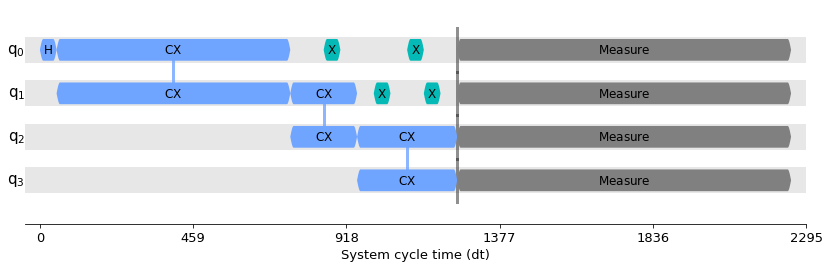

In [27]:
# balanced X-X sequence on all qubits
dd_sequence = [XGate(), XGate()]
pm = PassManager([ALAPSchedule(durations),
                  DynamicalDecoupling(durations, dd_sequence)])
circ_dd = pm.run(circ)
timeline_drawer(circ_dd)

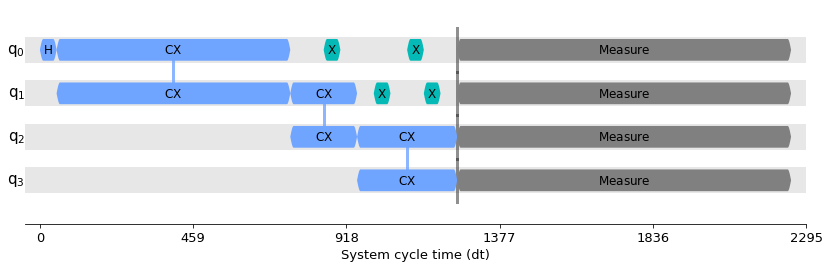

In [29]:
# balanced X-X sequence on all qubits
dd_sequence = [XGate(), XGate()]
pm = PassManager([ASAPSchedule(durations),
                  DynamicalDecoupling(durations, dd_sequence)])
circ_dd = pm.run(circ)
timeline_drawer(circ_dd)

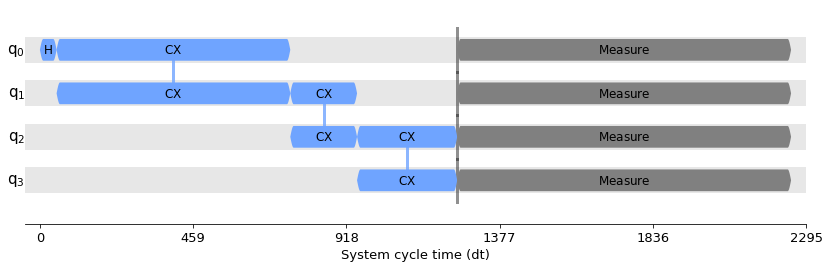

In [31]:
# balanced X-X sequence on all qubits
dd_sequence = [XGate(), XGate()]
pm = PassManager([ALAPSchedule(durations)])
circ_dd = pm.run(circ)
timeline_drawer(circ_dd)